# Final Project
DATA 602: Introduction to Data Analysis and Machine Learning <br/>
*Professor*: Dr. Yalin Bastanlar <br/>
University of Maryland Baltimore County <br/>
*Submitted by*: Harikrishna Bhumani

In [1]:
# import all the required libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data602_exam.csv')
df.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.0,...,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0,2
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.0,...,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0,8
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.0,...,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0,6
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.0,...,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0,4
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.0,...,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0,1


In [3]:
# rows & columns
print(df.shape)

(4999, 1805)


In [4]:
# unique values in target column
print(df.target.unique())

[2 8 6 4 1 3 9 5 7]


- From the above, we can say that it is **Supervised Classification** model.

In [5]:
# count the number of values for each class
print(df['target'].value_counts())

3    1344
2    1060
1     696
8     559
9     472
6     371
4     233
7     192
5      72
Name: target, dtype: int64


In [6]:
# split the dataset into train(75 %) and test(25 %)

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis=1),df['target'],test_size=.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
display(X_train)

(3749, 1804)
(1250, 1804)


,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
3311,4.0,4.000000,869.0,21.0,7.000000,780.0,7.0,40.0,17.0,79.0,...,9219.509778,210257.639766,-61821.916534,143254.108536,50379.319573,-56999.923904,125356.502939,163905.103718,237951.303109,164807.0
4370,6.0,6.000000,3784.0,0.0,57321.958465,3990.0,0.0,4.0,4.0,3.0,...,-121682.369185,-39447.570684,129150.179016,91672.822521,-93921.623718,123761.831580,-38425.723337,-59096.751251,64767.929428,7051.0
1870,3.0,77947.875882,2484.0,21.0,7.000000,992.0,7.0,65.0,28.0,136.0,...,129392.001007,-123002.185275,54088.178590,173738.561777,-72342.127720,-92451.904395,-71955.780148,-95784.217111,12405.000000,5041.0
4127,3.0,3.000000,31.0,12.0,54626.663571,30.0,4.0,3.0,0.0,10.0,...,61376.241788,-54821.519692,209653.164968,10721.277235,60777.675526,106755.472455,85607.576596,41150.672120,67533.000000,64795.0
1616,3.0,3.000000,127.0,12.0,4.000000,39.0,4.0,12.0,0.0,9.0,...,13826.357728,26719.067783,-32435.486388,57358.854942,119165.482380,34489.206282,-81423.797718,-68162.346889,71653.000000,68633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3.0,3.000000,545.0,24.0,8.000000,1081.0,8.0,8.0,1.0,36.0,...,-48047.129411,31542.697821,-66585.711150,-131269.591391,98387.269615,78299.060225,262539.132631,98985.747229,14579.000000,6965.0
466,6.0,72102.609308,2783.0,0.0,3.000000,2713.0,0.0,4.0,4.0,3.0,...,-87731.601489,180832.037120,98920.988456,-7491.577559,-85199.148989,-201341.578092,114826.995512,2073.396217,14767.000000,10642.0
3092,3.0,3.000000,19.0,12.0,4.000000,11.0,4.0,9.0,0.0,16.0,...,5522.674037,-9262.137108,29475.688504,16417.721231,-47569.144978,-111726.547368,4178.003014,165109.563821,72036.000000,68354.0
3772,3.0,3.000000,3267.0,9.0,3.000000,1156.0,3.0,27.0,6.0,23.0,...,-6748.070559,-136321.454025,-65099.625862,70369.797516,12163.707135,-174578.282889,157747.247397,-59947.025475,12371.000000,8369.0


## DecsionTree Classifier:

In [7]:
# train the model with DecisionTreeClassifier with default entropy 'gini'

tree = DecisionTreeClassifier(max_depth=100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100)

In [8]:
# train and test scores of decision tree model

print("Train set score:",tree.score(X_train,y_train))
print("Test set score:",tree.score(X_test,y_test))

Train set score: 1.0
Test set score: 0.8096


In [9]:
# confusion matrix

print(confusion_matrix(tree.predict(X_test),y_test))

[[139  11   4   3   2   6   0   3   3]
 [  3 237   7   3   1   5   3   4   3]
 [  2   4 308   1   4  11   2   7   4]
 [  5   7   0  34   1   3   1   5   5]
 [  2   4   4   1   3   0   1   3   1]
 [  7   5   4   2   1  60   2   4   1]
 [  3   3   5   2   0   1  32   4   7]
 [ 10   8   1   2   0   2   2 105   5]
 [  0   4   3   2   0   2   0   7  94]]


## DecisionTreeClassifier with criteria 'Entropy'

In [10]:
# train the model with DecisionTreeClassifier with default entropy 'entropy'

entropy_tree = DecisionTreeClassifier(criterion='entropy') 
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
# train and test scores

print("Train set score:",entropy_tree.score(X_train,y_train))
print("Test set score:",entropy_tree.score(X_test,y_test))

Train set score: 1.0
Test set score: 0.8192


- Score increased with **Entropy** criteria compared to **Gini**

## Feature Selection with their Importances:

In [12]:
# create a pandas series and index with train df columns
# this maps the columns with their importances
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)

# select the top 300 features based on importance
top_features = feature_importances.nlargest(300)

# print the top features
print(top_features)

Img0.1                  0.223218
section_names_header    0.176392
dc_por                  0.086962
TB_12                   0.060069
_except_handler3        0.045592
                          ...   
TB_11                   0.000320
TB_15                   0.000320
TB_18                   0.000320
TB_42                   0.000320
TB_65                   0.000320
Length: 300, dtype: float64


### Why only top 300 features?
- Beyond 300 features, there is no improvement in score. Hence I took only top 300 features.

In [13]:
# split the train and test df from the selected features

m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(df[top_features.index],df['target'],test_size=.25, random_state=42)

### DecisionTree Classification with seletive features:

In [14]:
print('New Train dataframe size',m_X_train.shape)
print('New Test dataframe size',m_X_test.shape)
display(m_X_train)

New Train dataframe size (3749, 300)
New Test dataframe size (1250, 300)


,Img0.1,section_names_header,dc_por,TB_12,_except_handler3,Offset.1,TB_b5,dd_text,TB_8e,Img35,...,ImageList_Draw,__vbaStrVarVal,InitCommonControls,__vbaInStr,TB_04,TB_11,TB_15,TB_18,TB_42,TB_65
3311,2.001739e+05,0.0,0.950888,23758.371546,0.0,4.198400e+06,599.0,0.002086,431.0,0.000036,...,0.000000,0.000000,0.000000,0.0,7430.000000,240.0,417.0,8155.000000,476.0,93266.72921
4370,4.439841e+04,19.0,0.355571,425.000000,0.0,1.811153e+09,420.0,0.000362,372.0,0.000076,...,0.000000,0.000000,0.000000,0.0,1830.000000,443.0,415.0,544.000000,520.0,891.00000
1870,-2.849105e+04,18.0,0.869786,414.000000,3.0,4.198400e+06,346.0,0.005651,384.0,0.000032,...,0.000000,0.000000,2783.733904,0.0,667.000000,397.0,1138.0,537.000000,395.0,1075.00000
4127,1.305014e+06,17.0,0.995461,3048.000000,0.0,4.198400e+06,3068.0,0.029582,2972.0,0.001688,...,35031.633322,0.000000,0.000000,0.0,3135.000000,3288.0,3169.0,3120.000000,3079.0,3206.00000
1616,1.531765e+06,17.0,0.387998,3102.000000,0.0,4.198400e+06,3283.0,0.058217,3395.0,0.001549,...,75284.665007,0.000000,0.000000,0.0,50285.202258,3111.0,3243.0,3158.000000,3271.0,3413.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3.956638e+04,18.0,0.622953,130.000000,4.0,4.198400e+06,102.0,0.603247,369.0,0.000012,...,0.000000,0.000000,0.000000,0.0,1604.000000,180.0,988.0,1006.000000,658.0,291.00000
466,-1.386314e+05,19.0,0.045108,383.000000,0.0,1.877288e+09,328.0,0.000587,380.0,0.000067,...,0.000000,0.000000,0.000000,0.0,1597.000000,410.0,407.0,83824.046146,1175.0,743.00000
3092,1.808965e+06,17.0,0.537245,3175.000000,0.0,4.198400e+06,3230.0,0.112214,3244.0,0.001550,...,0.000000,19244.623841,37044.614457,0.0,3433.000000,3189.0,3261.0,3256.000000,3276.0,3391.00000
3772,9.179528e+04,19.0,0.218613,446.000000,0.0,2.684378e+08,292.0,0.003766,348.0,0.000030,...,0.000000,52493.361231,0.000000,0.0,1202.000000,635.0,571.0,607.000000,401.0,965.00000


In [15]:
# again train the model with selective features

entropy_tree = DecisionTreeClassifier(criterion='entropy') 
entropy_tree.fit(m_X_train, m_y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
print("Train set score on selective features :",entropy_tree.score(m_X_train,m_y_train))
print("Test set score on selective features :",entropy_tree.score(m_X_test,m_y_test))

Train set score on selective features : 1.0
Test set score on selective features : 0.8144


### Precision & Recall:

In [17]:
# print the precision, recall
print(classification_report(entropy_tree.predict(m_X_test),m_y_test))

              precision    recall  f1-score   support

           1       0.84      0.81      0.82       177
           2       0.86      0.88      0.87       274
           3       0.90      0.91      0.90       332
           4       0.70      0.66      0.68        53
           5       0.17      0.08      0.11        24
           6       0.71      0.67      0.69        96
           7       0.74      0.64      0.69        50
           8       0.74      0.78      0.76       134
           9       0.76      0.85      0.80       110

    accuracy                           0.81      1250
   macro avg       0.71      0.70      0.70      1250
weighted avg       0.81      0.81      0.81      1250



### Though 1400 features are dropped, score remains almost same with slight decrease.

In [18]:
# to ignore the warnings
import warnings

warnings.filterwarnings('ignore')

In [19]:
# train the model with LogisticRegression with selective features

log_reg = LogisticRegression(C=1.0)
log_reg.fit(m_X_train,m_y_train)

LogisticRegression()

In [20]:
print("Train set score :",log_reg.score(m_X_train,m_y_train))
print("Test set score :",log_reg.score(m_X_test,m_y_test))

Train set score : 0.5438783675646839
Test set score : 0.5624


In [21]:
# train with max_iter 
lr = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=500, multi_class='auto')
lr.fit(m_X_train,m_y_train)

LogisticRegression(max_iter=500)

In [22]:
print("Train set score :",lr.score(m_X_train,m_y_train))
print("Test set score :",lr.score(m_X_test,m_y_test))

Train set score : 0.618031475060016
Test set score : 0.5904


### Observations from Logistic regression:
- Score is very low compared to Decsison Trees.
- No better improvement with l2 regularization.

### Support Vector Machine:

In [23]:
# train the model with Support Vector Classifier

svm = SVC(kernel='rbf', C=1,gamma='scale',degree=5)
svm.fit(m_X_train, m_y_train)
print("SVM score with rbf kernel: ", accuracy_score(m_y_test, svm.predict(m_X_test)))

SVM score with rbf kernel:  0.368


In [24]:
# train the model with LinearSVC

svm = LinearSVC()
svm.fit(m_X_train, m_y_train)
print("SVM score with linear kernel: ", accuracy_score(m_y_test, svm.predict(m_X_test)))

SVM score with linear kernel:  0.4968


In [25]:
# gridsearchcv for Support vector classifier

svm_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', SVC())])

param_grid = [
  {'model__C': [0.01, 0.1, 1, 10, 100, 1000], 'model__kernel': ['linear','rbf']}
]

svm_results = GridSearchCV(estimator=svm_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
svm_results = svm_results.fit(m_X_train, m_y_train)

print(confusion_matrix(svm_results.predict(m_X_test),m_y_test))

[[105  22   1  12   1   8   0  20   9]
 [ 19 212   3   7   1  17   7  12  50]
 [  3   4 328   3   8   8  23   6   3]
 [  3   1   0   3   0   3   0   2   4]
 [  0   0   0   0   0   0   0   0   0]
 [  3   7   1   3   0  18   2  19   8]
 [  0   0   0   0   0   0   7   1   0]
 [ 27  18   2  14   1  25   3  59  24]
 [ 11  19   1   8   1  11   1  23  25]]


In [26]:
print(svm_results.score(m_X_test, m_y_test))

0.6056


In [27]:
print(svm_results.best_params_)

{'model__C': 10, 'model__kernel': 'rbf'}


### KNN

In [28]:
# train the model with KNN

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(m_X_train,m_y_train)

KNeighborsClassifier(n_neighbors=9)

In [29]:
print('Train score :',knn.score(m_X_train, m_y_train))
print('Test score :',knn.score(m_X_test, m_y_test))

Train score : 0.6649773272872767
Test score : 0.5808


### Observation:
- SVM and KNN classifiers scores are very low compared to DecisionTree Classifier.

### Random Forest:

In [30]:
# train the model with RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(m_X_train, m_y_train)

RandomForestClassifier()

### Random Forest Score:

In [31]:
# Random Forest classifier scores

print("Train dataset score : ", accuracy_score(m_y_train, rfc.predict(m_X_train)))
print("Test dataset score : ", accuracy_score(m_y_test, rfc.predict(m_X_test)))

Train dataset score :  1.0
Test dataset score :  0.9112


In [32]:
print(confusion_matrix(rfc.predict(m_X_test),m_y_test))

[[162   5   1   4   1   2   0   9   2]
 [  3 265   6   3   1   2   2   2   4]
 [  2   4 328   1   5   6   0   4   2]
 [  0   0   0  38   0   3   0   1   0]
 [  0   0   0   0   4   0   0   0   0]
 [  1   4   0   2   1  72   1   3   1]
 [  0   0   0   0   0   0  38   0   0]
 [  3   3   1   1   0   2   2 121   3]
 [  0   2   0   1   0   3   0   2 111]]


In [33]:
print(classification_report(rfc.predict(m_X_test),m_y_test))

              precision    recall  f1-score   support

           1       0.95      0.87      0.91       186
           2       0.94      0.92      0.93       288
           3       0.98      0.93      0.95       352
           4       0.76      0.90      0.83        42
           5       0.33      1.00      0.50         4
           6       0.80      0.85      0.82        85
           7       0.88      1.00      0.94        38
           8       0.85      0.89      0.87       136
           9       0.90      0.93      0.92       119

    accuracy                           0.91      1250
   macro avg       0.82      0.92      0.85      1250
weighted avg       0.92      0.91      0.91      1250



In [34]:
# ref from https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

all_accuracies = cross_val_score(estimator=rfc, X=m_X_train, y=m_y_train, cv=5)
print(all_accuracies)

[0.892      0.88933333 0.90933333 0.908      0.90921228]


### GridSearchCV for RandomForestClassifier:

In [35]:
parameters = {
    'n_estimators': (100,200),
    'max_depth': (5, 10, 20)
    #'min_samples_split': (2, 3, 5, 8, 10)
   }

rfc_grid = GridSearchCV(RandomForestClassifier(),param_grid = parameters,cv = 3)    

In [36]:
# train the model with GridSearchCV
model = rfc_grid.fit(m_X_train,m_y_train)
print('Random Forest GridSearchCV Best Score :',model.best_score_)
print('Random Forest Best params :',model.best_params_)

Random Forest GridSearchCV Best Score : 0.9010433947157725
Random Forest Best params : {'max_depth': 20, 'n_estimators': 200}


## DecisionTreeClassifier parameter Tuning:

In [37]:
tree_pipeline = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', DecisionTreeClassifier())])

param_grid = [ {
   'model__max_depth': [5, 10, 20, 50, 100, 200],
   'model__min_samples_split':[3, 5, 10, 15, 20, 30], 
   'model__criterion': ['gini','entropy']}
]

tree_results = GridSearchCV(estimator=tree_pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
tree_results = tree_results.fit(m_X_train, m_y_train)

print(confusion_matrix(tree_results.predict(m_X_test),m_y_test))

[[151   7   3   4   1   4   0  10   2]
 [  3 260   6   3   1   2   3   3   3]
 [  2   4 323   1   5   8   1   5   2]
 [  1   2   0  36   0   3   1   1   0]
 [  0   0   1   0   2   0   1   0   2]
 [  5   3   0   2   3  67   1   3   0]
 [  1   2   0   1   0   1  34   0   1]
 [  8   3   3   2   0   4   2 117   7]
 [  0   2   0   1   0   1   0   3 106]]


## Decision Tree Score & Best Params:

In [38]:
# DecisionTree gridsearchcv score 
print(tree_results.score(m_X_test, m_y_test))

0.8768


In [39]:
# DecisionTree gridsearchcv best params 
print(tree_results.best_params_)

{'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_split': 5}


### Score V/s Max depth 

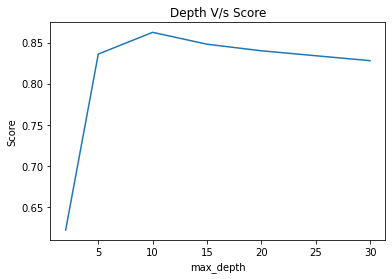

In [40]:
max_depths = [2, 5, 10, 15, 20, 30]
scores = np.zeros(len(max_depths))
index = 0

for d in max_depths:
    tree = DecisionTreeClassifier(max_depth=d, min_samples_split=5)
    tree.fit(m_X_train,m_y_train)
    u=tree.score(m_X_test, m_y_test)
    scores[index]=u
    index+=1

x = np.array(range(0,len(max_depths)))
plt.plot(max_depths, scores)
plt.title('Depth V/s Score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.show()    

### Observation:
- From the above GridSearchCV and plotted graph, we can see that max score of 0.87 is achievable with Decision score.
- max_depth : 10
- Criteria : 'gini'
- min_samples_split : 5

## Conclusion
- The original dataset has 1805 columns but most of columns are having zero or low importances. So I started training the model with top 100,200,300,.....features. After 300 features, there is no improvement in accuracy. Hence I took top 300 features.
- With Logistic regression, SVM and KNN classifiers, the accuracy is **~ 60 %**, which is low. 
- With Decision trees the initial accuracy is of **82 %**. With paramter tuning, I have achieved **87 %** accuracy with 'gini' entropy and max_depth=10.
- With RandomForestClassifier the results are **91 %** accurate . 
- In comparision with all the models, **RandomForest** fits better to this dataset.